<a href="https://colab.research.google.com/github/linusms/Hands-on/blob/main/chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (21.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y=mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

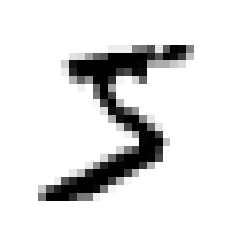

5


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 70000개의 이미지에 각각 28*28=784개의 픽셀 존재. 각 픽셀마다 픽셀 강도(0~255)를 값으로 가짐
# 샘플의 특성 벡터들, 1*784 배열을 28*28 배열로 나타냄(reshape)

some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)


plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

# 해당 샘플의 레이블 확인. 유추했던 5와 같음
# 레이블은 문자열. 이를 정수로 변환하는 게 머신러닝 알고리즘에 도움
print(y[0])
y=y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
# 이진 분류기(5는 True, 다른 숫자는 False 반환)
# y_train_5의 자료형은 배열

y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [8]:
# 확률적 경사 하강법 분류기 이용. 
# X_train이라는 훈련 데이터와 y_train_5라는 target값 지정
# y_train_5는 훈련 데이터의 레이블이 5일 경우 1(True), 아니면 0(False)을 반환
# 이진 분류기 사용을 위해 레이블을 0 또는 1로 변경

from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [9]:
# 학습된 모델을 토대로 예측하기
# True 값이 나오는 array 반환(타겟 값도 array 자료형이었으므로?)

sgd_clf.predict([some_digit])


array([ True])

In [10]:
# 참고 : k-겹 교차 검증 수행 코드 구현해보기
# 이는 cross_val_score() 함수와 거의 동일한 기능 수행(분류에서는)

# skfolds는 StratifiedKFold 객체
# skfolds.split은 이 객체를 훈련 데이터와 테스트 데이터로 나누는 메서드
# KFold와는 달리 split 시 레이블도 매개변수로 받아야 함(필수)
# why? 레이블 분포도에 따라 폴드를 나누는 방법이기 때문
# 먼저 

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 질문: StratifiedKFold는 뷴류기이다. 왜 굳이 split 메소드를 쓰기 위해 이 객체를 지정해야 하는지?
# 어차피 폴드 생성을 위한 것이라면, 그냥 StratifiedKFold라는 함수 내지 메소드를 만들었으면 좋았을텐데..
# 왜 StratifiedKFold를 클래스로 만들었는지 궁금. 폴드 나누기 이외에도 이 객체가 자주 쓰이는가?

skfolds=StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# StratifiedKFold 객체에 내장된 메소드인 split을 이용해 훈련 세트/테스트 세트가 될 샘플들의 인덱스를 추출 
# 깨알같은 folds와 fold의 차이(즉, 훈련 세트들이 될 폴드'들'과 테스트 세트가 되는 폴드의 차이) 유의
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds=X_train[train_index]
  y_train_folds=y_train_5[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train_5[test_index]

  # clone_clf는 앞서 사용한 SGD 분류기 모델의 복사본 
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)

  # 정답 개수 / 총 예측값들 개수
  print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [11]:
# 정확도가 95% 이상

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.base import BaseEstimator

# Never5Classifier라는 클래스 생성. 즉 5를 분류하는 분류기 생성
# 앞서 배웠듯이, BaseEstimator 계승을 통해 get_params, set_params 함수 갖다쓰기

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [13]:
# 정확도가 90% 이상. 하지만 데이터의 10%만 숫자 5이기 때문에
# 사실상 의미 없는 정확도. 이는 불균형한 데이터셋(특정 카테고리값이 다른 것보다 월등히 많은 경우) 흔히 발생하는 문제
# 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유

never_5_clf=Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [14]:
# 평가 점수가 아닌, 테스트 폴드에서 얻은 '예측' 반환
# 훈련하는 동안 보지 못한 데이터에 대해 예측한 값 반환
# y_train_pred에는 실제5-예측5, 실제5-예측5아님으로 분류된 예측값들 존재

from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
# 오차 행렬 생성(오진률 표와 비슷)
# 첫 행은 음성 클래스(5가 아닌 샘플들), 두번째 행은 양성 클래스(5가 아닌 샘플들)
# 첫 열은 음성 판정(5가 아니라고 예측한 예측값의 수), 두번째 열은 양성 판정(5라고 예측)
# 완벽한 분류기는 오답의 가능성이 없으므로 대각행렬이 될 것

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
# 앞선 5분류기의 정밀도

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [17]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [19]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [20]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [21]:
# cross_val_predict 함수에서 결정 점수를 반환받도록 method 지정


y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

# 가능한 모든 임계값에서의 정밀도와 재현률을 반환하는 precision_recall_curve 함수 이용

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
  plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
  plt.plot(thresholds, recalls[:-1], 'g--', label='재현률')
  plt.legend()
  plt.xlabel('임곗값')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


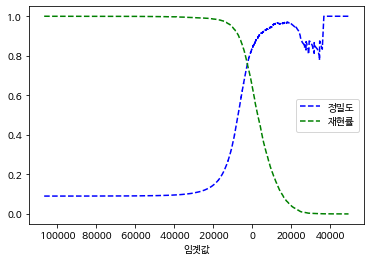

In [22]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

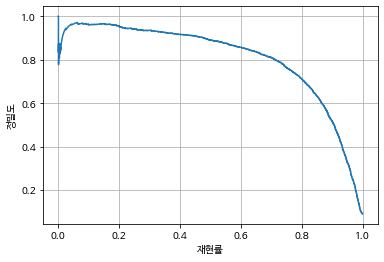

In [24]:
plt.plot(recalls, precisions)
plt.xlabel('재현률')
plt.ylabel('정밀도')
plt.grid()
plt.show()


In [27]:
# 정밀도 90%가 되는 첫번째 True 값. 즉 조건이 True가 되는 첫번째 인덱스

threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]

# 정밀도 90%가 되는 분류기
# 내가 원하는 정밀도를 가지는 분류기를 만들 수 있다
# 임계값보다 결정함수 값이 높은 경우만을 True로 반환하는 타겟 값 설정

y_train_pred_90=(y_scores>=threshold_90_precision) 
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.grid()
  plt.xlabel('거짓 양성 비율')
  plt.ylabel('진짜 양성 비율(재현율)')

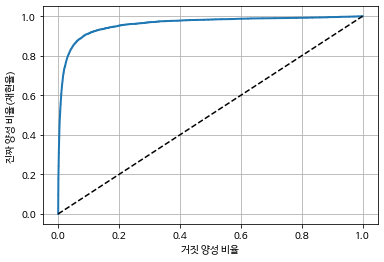

In [36]:
plot_roc_curve(fpr,tpr)
plt.savefig('ROC 그래프.png')

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

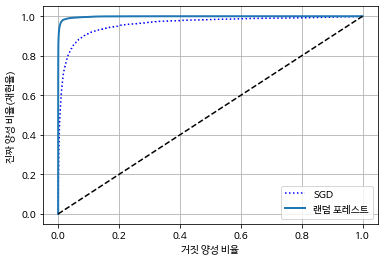

In [40]:
# 양성 클래스 확률을 점수로 사용

y_scores_forest=y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)


# 그래프를 보면 랜덤 포레스트 분류기가 SGD보다 훨씬 좋은(더 좌상단에 위치한) 것을 볼 수 있음
# 이는 그래프 밑 면적(AUC)가 높다는 뜻
plt.plot(fpr, tpr, "b:", label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, '랜덤 포레스트')
plt.legend(loc='lower right')
plt.show()

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145